<b><font size = 6, color = #5c1919> A/B Testing with Thompson Sampling</font><b>
<h3><p>Explore? or Exploit? </p></h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class Bandit_Thompson():
    """
    There are `num_arms` different adverts/arms/actions for which only 1 will be shown to the user/subject/customer once.
    The user can either decide to click 1 or not to click 0.
    Our goal is to show the users the adverts in such a way as to maximize the rewards - most clicks.
    """
    def __init__(self, num_arms , alpha = .1):
        self.arms = num_arms
        self.epochs = 0
        self.total_rewards = 0
        self.C = np.sqrt(alpha) # How quickly learning takes place
        self.ad_selected = []
        self.number_of_selections = np.zeros(self.arms, dtype = np.longdouble)
        self.sum_of_rewards = np.zeros(self.arms, dtype = np.longdouble)
    
    def select_arm(self):
        if self.epochs < self.arms: # Go though all the arms once the first round
            upperBound = np.zeros(self.arms, dtype = np.longdouble) + 1e400 # This initializes all the arm's rewards to a very high value.
            self.ad = self.epochs
            self.ad_selected.append(self.ad)# Update the list of adds selected with the current ad
            self.number_of_selections[self.ad] += 1 # increase the number of times this ad is selected by 1  
        else:
            average_rewards = np.divide(self.sum_of_rewards, self.number_of_selections) # Get the average reward for each ad
            delta = self.C*np.sqrt(np.divide(np.log(self.epochs+1), self.number_of_selections))
            upperBound = average_rewards + delta
            self.ad = np.random.choice(np.flatnonzero(upperBound==upperBound.max())) # select arm with highest upper bound.
            # Where there is a tie pick randomly
            self.ad_selected.append(self.ad)
            self.number_of_selections[self.ad] += 1 # increase the number of times this ad is selected by 1
        return self.ad
    
    def update(self, reward=0):
        self.sum_of_rewards[self.ad] += reward # Compute the total expected reward for choosing ad
        self.total_rewards += reward # Keep track of cumulative rewards obtained from all arms selected
        self.epochs += 1
        
    def feedback(self):
        plt.figure(figsize=(15,8))
        tick_marks=[i for i in range(self.arms)]
        plt.xticks(tick_marks,[f'Arm{n}' for n in range(self.arms)])
        plt.bar(pd.Series(self.ad_selected).value_counts().index,pd.Series(self.ad_selected).value_counts(), color = '#5c1919')
        plt.title('Active Learning - Thompson'); plt.show()
        print(f'\n\nNumber of selections for each arm\n{pd.Series(self.number_of_selections).astype("int")}')
        print('\n'*2)
        print(f'Sum of rewards for each arm\n{pd.Series(self.sum_of_rewards)}')
        print('\n'*2)
        print(f"Total rewards\n{self.total_rewards}")
        #plt.show()

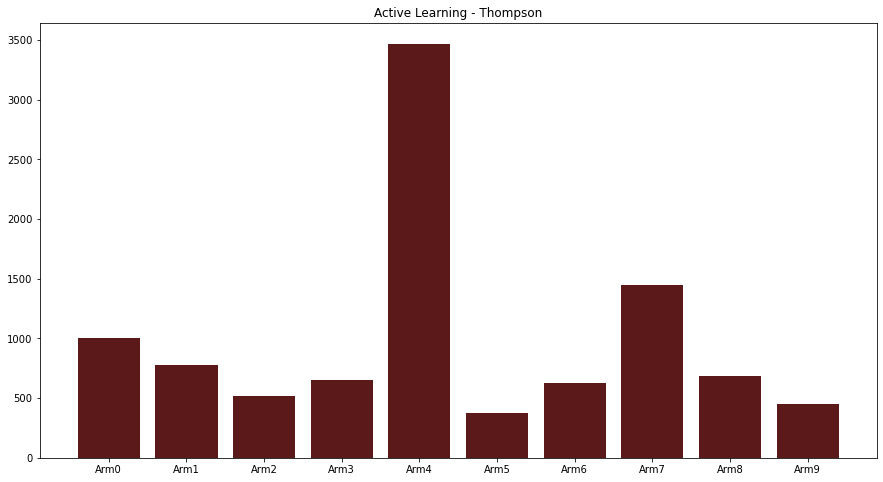



Number of selections for each arm
0    1007
1     777
2     518
3     649
4    3469
5     374
6     623
7    1444
8     686
9     453
dtype: int32



Sum of rewards for each arm
0    157.0
1     98.0
2     37.0
3     67.0
4    887.0
5      7.0
6     61.0
7    276.0
8     76.0
9     23.0
dtype: float64



Total rewards
1689


In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv") #source: https://www.kaggle.com/akram24/ads-ctr-optimisation/download
num_arms = df.shape[1]
bandit = Bandit_Thompson(num_arms, alpha = 5)
for n in range(len(df)):
    arm_selected = bandit.select_arm()
    reward = df.iat[n,arm_selected]
    bandit.update(reward)
bandit.feedback()

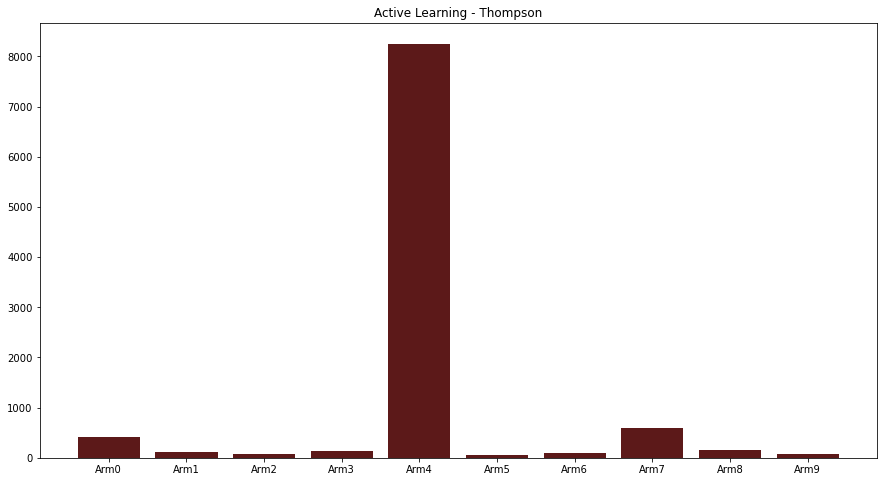



Number of selections for each arm
0     424
1     118
2      74
3     139
4    8255
5      62
6     102
7     597
8     149
9      80
dtype: int32



Sum of rewards for each arm
0      79.0
1      11.0
2       3.0
3      15.0
4    2221.0
5       1.0
6       8.0
7     121.0
8      17.0
9       4.0
dtype: float64



Total rewards
2480


In [3]:
bandit = Bandit_Thompson(num_arms, alpha = .5)
for n in range(len(df)):
    arm_selected = bandit.select_arm()
    reward = df.iat[n,arm_selected]
    bandit.update(reward)
bandit.feedback()

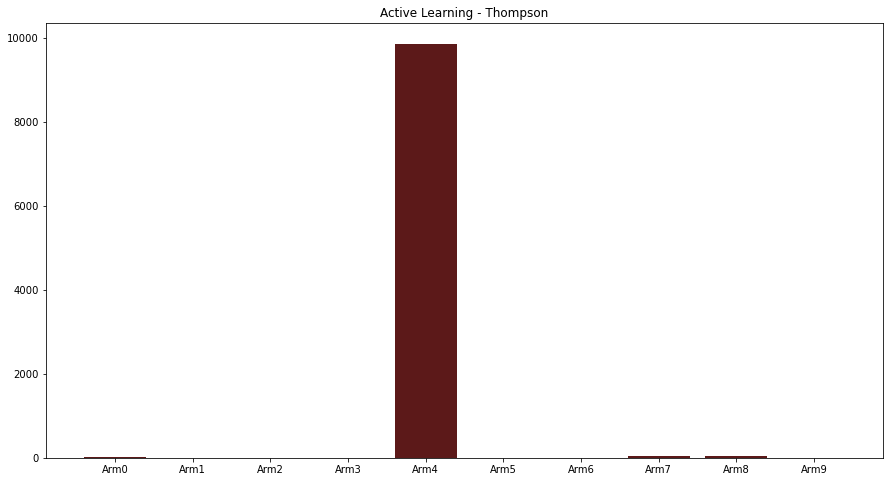



Number of selections for each arm
0      13
1       7
2       7
3       7
4    9865
5       7
6       7
7      33
8      47
9       7
dtype: int32



Sum of rewards for each arm
0       1.0
1       0.0
2       0.0
3       0.0
4    2653.0
5       0.0
6       0.0
7       5.0
8       8.0
9       0.0
dtype: float64



Total rewards
2667


In [4]:
bandit = Bandit_Thompson(num_arms, alpha = .05)
for n in range(len(df)):
    arm_selected = bandit.select_arm()
    reward = df.iat[n,arm_selected]
    bandit.update(reward)
    
bandit.feedback()